In [55]:
import matplotlib.pyplot as plt
import pandas as pd
from darts import TimeSeries
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.dataprocessing.transformers import MissingValuesFiller, Scaler
from darts.metrics import r2_score, mse
from darts.models import TCNModel

# Preparing the Data

Loading data...
Creating TimeSeries...


/var/folders/bx/kph22wks5gs1xyk00c88c00c0000gn/T/ipykernel_53123/2437906762.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_day_avg = df.groupby(df['time'].astype(str).str.split(" ").str[0]).mean().reset_index()


Filling missing values...


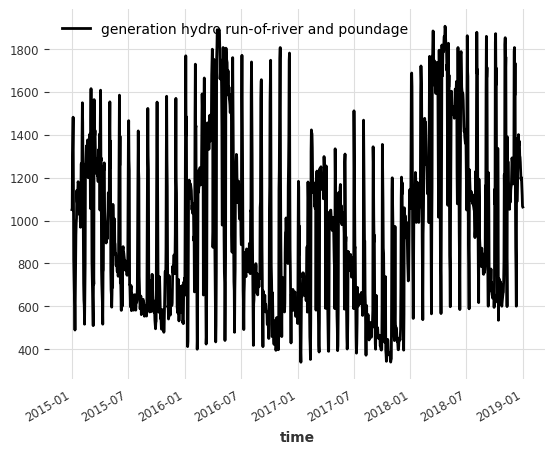

In [39]:
print("Loading data...")
df = pd.read_csv('energy_dataset.csv', delimiter=",")
df['time'] = pd.to_datetime(df['time'], utc=True)
df['time']= df.time.dt.tz_localize(None)

print("Creating TimeSeries...")
df_day_avg = df.groupby(df['time'].astype(str).str.split(" ").str[0]).mean().reset_index()

print("Filling missing values...")
value_filler = MissingValuesFiller()
series = value_filler.transform(TimeSeries.from_dataframe(df_day_avg, 'time', ['generation hydro run-of-river and poundage']))

series.plot()

In [7]:
df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [10]:
df2 = series.pd_dataframe() 
df2

component,generation hydro run-of-river and poundage,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31,1051.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2015-01-01,1056.916667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-02,1300.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-03,1378.041667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-04,1481.916667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,1187.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2018-12-28,1152.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-12-29,1117.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
df2.describe()

component,generation hydro run-of-river and poundage,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,...,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.00000,1462.000000,1462.000000
mean,972.223312,0.032832,0.032832,0.032832,0.032832,0.032832,0.032832,0.032832,0.032832,0.032832,...,0.032832,0.032832,0.032832,0.032832,0.032832,0.032832,0.032832,0.03078,0.030096,0.019836
std,392.181607,0.178257,0.178257,0.178257,0.178257,0.178257,0.178257,0.178257,0.178257,0.178257,...,0.178257,0.178257,0.178257,0.178257,0.178257,0.178257,0.178257,0.17278,0.170909,0.139484
min,339.291667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,640.885417,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,909.395833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1235.656250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1906.125000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Scaling data...


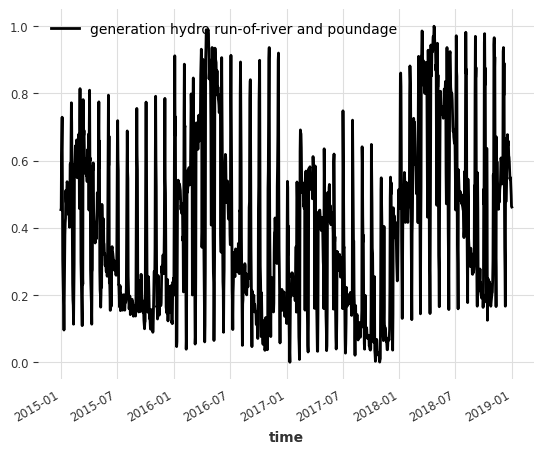

In [41]:

#series = series.add_datetime_attribute('day', one_hot=True)

print("Scaling data...")

# scale
scaler_en = Scaler()
series_en_transformed = scaler_en.fit_transform(series)
train_en_transformed, val_en_transformed = series_en_transformed.split_after(pd.Timestamp('20170901'))

# add the day as a covariate
day_series = datetime_attribute_timeseries(series_en_transformed, attribute='day', one_hot=True)
scaler_day = Scaler()
day_series = scaler_day.fit_transform(day_series)
train_day, val_day = day_series.split_after(pd.Timestamp('20170901'))

series_en_transformed.plot()


# 2. Choosing a Model

In [42]:
print("Creating model...")

model_en = TCNModel(
    input_chunk_length=365,
    output_chunk_length=7,
    n_epochs=50,
    dropout=0.2, 
    dilation_base=2, 
    weight_norm=True,
    kernel_size=5,
    num_filters=8,
    nr_epochs_val_period=1,
    random_state=0
)


Creating model...


# 3. Training the Model

In [43]:

print("Training model...")
model_en.fit(series=train_en_transformed, 
             past_covariates=train_day,
             verbose=True)

Training model...


2022-10-20 21:32:15 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-10-20 21:32:15 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-10-20 21:32:15 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-10-20 21:32:15 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-10-20 21:32:15 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 | dropout       | MonteCarloDropout | 0     
4 | res_blocks    | ModuleList        | 5.0 K 
----------------------------------------------------
5.0 K     Trainable params
0         Non-trainable params
5.0 K     Total params
0.040     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

2022-10-20 21:36:04 pytorch_lightning.utilities.rank_zero INFO: `Trainer.fit` stopped: `max_epochs=50` reached.


# 4. Evaluating the Model

In [ ]:
backtest_en = model_en.historical_forecasts(series=series_en_transformed,
                                            past_covariates=day_series,
                                            start=0.7,
                                            forecast_horizon=7,
                                            stride=1,
                                            retrain=False,
                                            verbose=False)


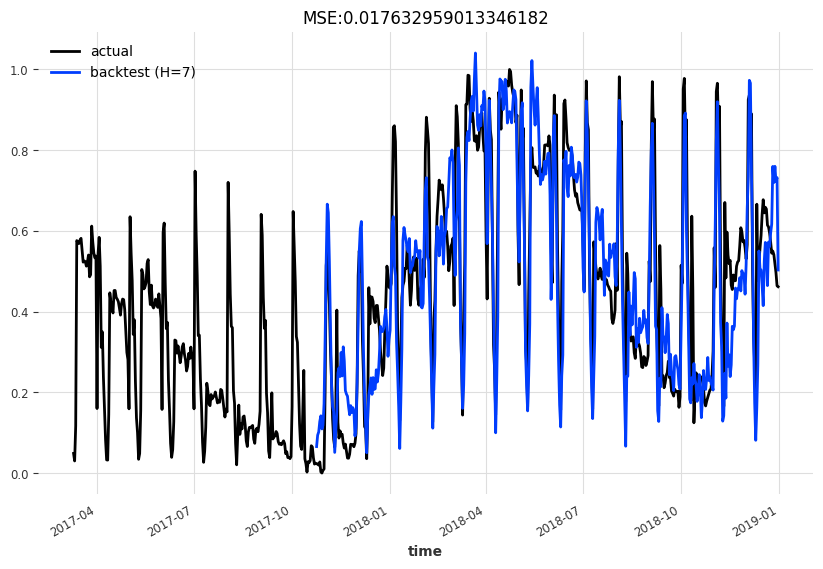

In [57]:
plt.figure(figsize=(10,6))
series_en_transformed[800:].plot(label='actual')
backtest_en.plot(label='backtest (H=7)')
mse_value = mse(series_en_transformed, backtest_en)

plt.title('MSE:' + str(mse_value))
plt.legend()

Visualizing results...


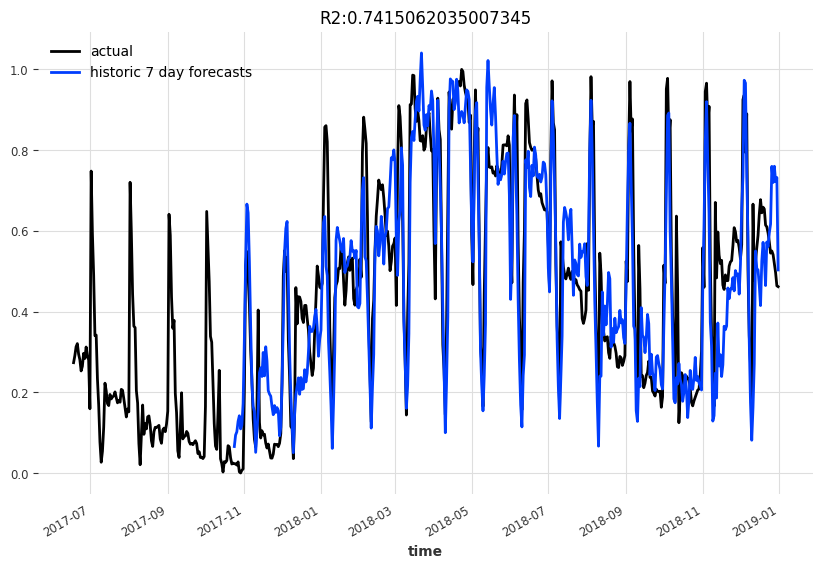

In [56]:


print("Visualizing results...")
plt.figure(figsize=(10,6))
series_en_transformed[900:].plot(label='actual')
backtest_en.plot(label=('historic 7 day forecasts'))
r2_score_value = r2_score(series_en_transformed, backtest_en)

plt.title('R2:' + str(r2_score_value))
plt.legend()


# 5. Saving the model

In [ ]:
print("Saving model...")
model.save()

print("Done!")